In [3]:
## ignore the first two blocks, jut importing and and displaying thesample image


In [7]:
# Step 1: Upload kaggle.json again
from google.colab import files
uploaded = files.upload()  # Select your kaggle.json file

# Step 2: Set up Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset

# Step 4: Extract it
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-and-cat-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

print("✅ Dataset ready!")

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 89% 692M/775M [00:11<00:01, 74.2MB/s]
100% 775M/775M [00:11<00:00, 69.6MB/s]
✅ Dataset ready!


In [9]:
# Download to Drive (only need to do this once)
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset -p /content/drive/MyDrive/

# Extract from Drive
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dog-and-cat-classification-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 98% 757M/775M [00:05<00:00, 92.7MB/s]
100% 775M/775M [00:07<00:00, 112MB/s] 


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [11]:
convolution_layers= VGG16(
    weights="imagenet",#use the vvgnet weights
    include_top=False, #remove the dense layer and just keep the convolutions layer
    #include_top is the dense layer part, false meaning dont use the dense layer part
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
convolution_layers.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#if you see the  vgg arch

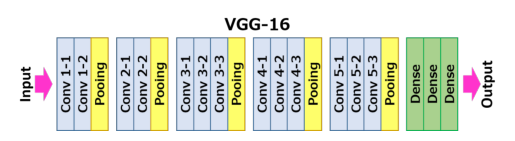

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with your actual filename
img = Image.open('./vgg16.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
#if u look at the model summary ,  the last layer is the bloc5 conv-3 and block5con pooling layer
# we didnt include the dense layer part

In [18]:
# create a custom model using the convolutional layers defined above, followed by our own dense layers
model = Sequential(
    [
        convolution_layers,  # add the convolutional layers defined above
        Flatten(),           # flatten the output into a 1D vector
        Dense(256, activation="relu"),  # our custom dense layer
        Dense(1, activation="sigmoid")  # output layer for binary classification
    ]
)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Freeze the convolutional layers so their weights are not updated during training
convolution_layers.trainable =False

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
# we can see the no of reduced to "Trainable params: 2,097,665 (8.00 MB)" from "Trainable params: 16,812,353 (64.13 MB)",
#since we freeze the conv layer

In [38]:
import tensorflow as tf
import os

def remove_files_tensorflow_cant_decode(directory):
    """Remove files that TensorFlow specifically can't decode"""
    removed = []

    for folder in ['Cat', 'Dog']:
        folder_path = os.path.join(directory, folder)
        print(f"Checking {folder} folder with TensorFlow decoder...")

        files = os.listdir(folder_path)
        for i, filename in enumerate(files):
            if i % 1000 == 0:
                print(f"  Progress: {i}/{len(files)}")

            file_path = os.path.join(folder_path, filename)

            try:
                # Try to decode with TensorFlow (same method used in training)
                img_raw = tf.io.read_file(file_path)
                img = tf.image.decode_image(img_raw, channels=3, expand_animations=False)

                # Try to ensure it's the right shape
                if len(img.shape) != 3 or img.shape[2] != 3:
                    print(f"  Removing {filename} - wrong shape: {img.shape}")
                    os.remove(file_path)
                    removed.append(filename)

            except tf.errors.InvalidArgumentError as e:
                print(f"  Removing {filename} - TF decode error")
                os.remove(file_path)
                removed.append(filename)
            except Exception as e:
                print(f"  Removing {filename} - {type(e).__name__}")
                os.remove(file_path)
                removed.append(filename)

    print(f"\n✅ Removed {len(removed)} more files")
    return removed

# Clean with TensorFlow decoder
removed = remove_files_tensorflow_cant_decode('/content/PetImages')

Checking Cat folder with TensorFlow decoder...
  Progress: 0/12472
  Progress: 1000/12472
  Progress: 2000/12472
  Progress: 3000/12472
  Progress: 4000/12472
  Progress: 5000/12472
  Removing 4351.jpg - TF decode error
  Removing 10404.jpg - TF decode error
  Progress: 6000/12472
  Progress: 7000/12472
  Progress: 8000/12472
  Progress: 9000/12472
  Progress: 10000/12472
  Progress: 11000/12472
  Progress: 12000/12472
Checking Dog folder with TensorFlow decoder...
  Progress: 0/12465
  Removing 9500.jpg - TF decode error
  Progress: 1000/12465
  Progress: 2000/12465
  Progress: 3000/12465
  Progress: 4000/12465
  Progress: 5000/12465
  Removing 11912.jpg - TF decode error
  Progress: 6000/12465
  Progress: 7000/12465
  Progress: 8000/12465
  Removing 2317.jpg - TF decode error
  Progress: 9000/12465
  Removing 2494.jpg - TF decode error
  Progress: 10000/12465
  Removing 11233.jpg - TF decode error
  Progress: 11000/12465
  Progress: 12000/12465

✅ Removed 7 more files


In [39]:
#build generators
train_datagen= keras.utils.image_dataset_from_directory(
    directory="/content/PetImages",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)

validation_datagen= keras.utils.image_dataset_from_directory(
    directory="/content/PetImages",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150),
)

Found 24930 files belonging to 2 classes.
Found 24930 files belonging to 2 classes.


In [40]:
#the images pixels values ranges from 0-255, we need to normalize them to bring them betwn 0-1
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_datagen = train_datagen.map(normalize_img)
validation_datagen = validation_datagen.map(normalize_img)

In [41]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
#history= model.fit(train_datagen,epochs=10,validation_data=validation_datagen)
#we will get a model that slightly overfits, but we can use different techniqque such as dataaug, dropouts, regularization

In [46]:
#i didnt runt the final code, because it took too long to excecute

#i did put all the code files related with this topic in the folder name(tf-campusx), #the code uses different dataset, but same concept
#see how everything works throught that code, or refer to that video
